In [3]:
%matplotlib inline
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

In [4]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy as sp
import csv
import geopandas as gpd
import shapely.wkt
import matplotlib as mpl
import seaborn as sns
from shapely.geometry import Point, LineString

## Example 1

In [5]:
def f(x):
  return x

interact(f, x=10);

## Example2_Fourier Transform

In [7]:
%matplotlib inline
from ipywidgets import interact
from math import pi
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

x=np.linspace(-10,10,1000,dtype='float');

def f(n=1):
  y=np.zeros(1000,dtype='float')
  for i in range(1,n+1,2):
    y=y+(1/i)*np.sin(i*pi*x/5)
    
  y=y*4/pi
  plt.title('Fourier series of square wave')
  plt.plot(x, y, 'blue', x, signal.square(pi*x/5),'red')
  
interact(f,n=(1,21,2));

interactive(children=(IntSlider(value=1, description='n', max=21, min=1, step=2), Output()), _dom_classes=('wi…

In [8]:
from ipywidgets import interact
import numpy as np

def downStairs(n = 1):
  for i in range(1, n+1):
    if i == n:
      print('-' * (n-1) + 'O')
      print('-' * (n+1))
    elif i < n:
      print('-' * i)
    else:
      print('-' * (n+1))

In [9]:
interact(downStairs, n = (1, 20));

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

## decay_v1

In [10]:
from numpy import *

def solver(I, a, T, dt, theta):
    """Solve u'=-a*u, u(0)=I, for t in (0,T] with steps of dt."""
    Nt = int(T/dt)            # no of time intervals
    T = Nt*dt                 # adjust T to fit time step dt
    u = zeros(Nt+1)           # array of u[n] values
    t = linspace(0, T, Nt+1)  # time mesh

    u[0] = I                  # assign initial condition
    for n in range(0, Nt):    # n=0,1,...,Nt-1
        u[n+1] = (1 - (1-theta)*a*dt)/(1 + theta*dt*a)*u[n]
    return u, t

In [11]:
  def drawplot(dt = 0.1):
    with plt.xkcd():
      # u, t = solver(I=1, a=2, T=8, dt=0.8, theta=1)
      u, t = solver(I=1, a=2, T=8, dt=dt, theta=1)

      # Plot the solution only
      plt.plot(t, u)
      plt.xlim(0,8)
      # print(dt)

In [12]:
interact(drawplot,dt=(0.1,2.0,0.1));

interactive(children=(FloatSlider(value=0.1, description='dt', max=2.0, min=0.1), Output()), _dom_classes=('wi…

## decay_v2

In [13]:
from numpy import *

def solver(I, a, T, dt, theta):
    """Solve u'=-a*u, u(0)=I, for t in (0,T] with steps of dt."""
    dt = float(dt)            # avoid integer division
    Nt = int(round(T/dt))     # no of time intervals
    T = Nt*dt                 # adjust T to fit time step dt
    u = zeros(Nt+1)           # array of u[n] values
    t = linspace(0, T, Nt+1)  # time mesh

    u[0] = I                  # assign initial condition
    for n in range(0, Nt):    # n=0,1,...,Nt-1
        u[n+1] = (1 - (1-theta)*a*dt)/(1 + theta*dt*a)*u[n]
    return u, t

def u_exact(t, I, a):
    return I*exp(-a*t)

In [14]:
# from matplotlib.pyplot import *

def plot_numerical_and_exact(theta, I, a, T, dt):
    """Compare the numerical and exact solution in a plot."""
    u, t = solver(I=I, a=a, T=T, dt=dt, theta=theta)

    t_e = linspace(0, T, 1001)        # fine mesh for u_e
    u_e = u_exact(t_e, I, a)

    plt.plot(
      t_e, u_e, 'b-',    # red dashes w/circles
      t,   u,   'r--o',  # blue line for exact sol.          
             )              
    plt.legend(['numerical', 'exact'])
    plt.xlabel('t')
    plt.ylabel('u')
    plt.title('theta=%g, dt=%g' % (theta, dt))
#     plt.savefig('plot_%s_%g.png' % (theta, dt))

In [15]:
def mydraw(dt=0.1):  
  with plt.xkcd():
    plot_numerical_and_exact(I=1, a=2, T=8, dt=dt, theta=1)  

In [16]:
interact(mydraw,dt=(0.1,2.0,0.1));

interactive(children=(FloatSlider(value=0.1, description='dt', max=2.0, min=0.1), Output()), _dom_classes=('wi…

## decay_v3

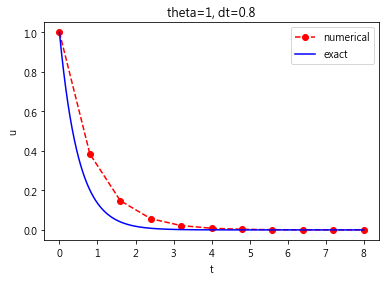

In [17]:
from numpy import *

def solver(I, a, T, dt, theta):
    """Solve u'=-a*u, u(0)=I, for t in (0,T] with steps of dt."""
    dt = float(dt)            # avoid integer division
    Nt = int(round(T/dt))     # no of time intervals
    T = Nt*dt                 # adjust T to fit time step dt
    u = zeros(Nt+1)           # array of u[n] values
    t = linspace(0, T, Nt+1)  # time mesh

    u[0] = I                  # assign initial condition
    for n in range(0, Nt):    # n=0,1,...,Nt-1
        u[n+1] = (1 - (1-theta)*a*dt)/(1 + theta*dt*a)*u[n]
    return u, t

def u_exact(t, I, a):
    return I*exp(-a*t)


def plot_numerical_and_exact(theta, I, a, T, dt):
    """Compare the numerical and exact solution in a plot."""
    u, t = solver(I=I, a=a, T=T, dt=dt, theta=theta)

    t_e = linspace(0, T, 1001)        # fine mesh for u_e
    u_e = u_exact(t_e, I, a)

    plt.plot(t,   u,   'r--o',            # red dashes w/circles
             t_e, u_e, 'b-')              # blue line for exact sol.
    plt.legend(['numerical', 'exact'])
    plt.xlabel('t')
    plt.ylabel('u')
    plt.title('theta=%g, dt=%g' % (theta, dt))
#     savefig('plot_%s_%g.png' % (theta, dt))

def test_solver_three_steps():
    """Compare three steps with known manual computations."""
    theta = 0.8; a = 2; I = 0.1; dt = 0.8
    u_by_hand = array([I,
                       0.0298245614035,
                       0.00889504462912,
                       0.00265290804728])

    Nt = 3  # number of time steps
    u, t = solver(I=I, a=a, T=Nt*dt, dt=dt, theta=theta)

    tol = 1E-15  # tolerance for comparing floats
    diff = abs(u - u_by_hand).max()
    success = diff < tol
#     assert success

test_solver_three_steps()
plot_numerical_and_exact(I=1, a=2, T=8, dt=0.8, theta=1)

theta   dt       error


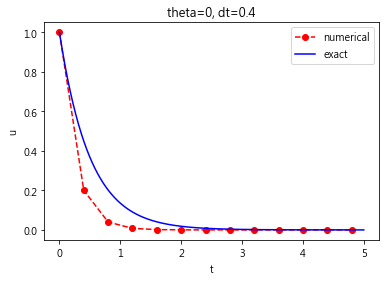

 0.0   0.40:    1.971E-01


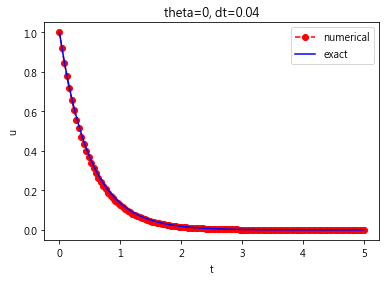

 0.0   0.04:    1.449E-02


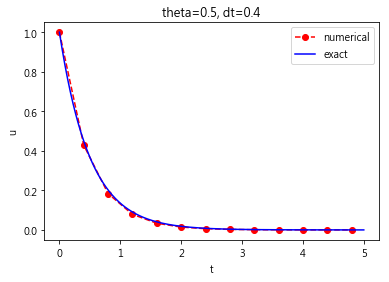

 0.5   0.40:    1.977E-02


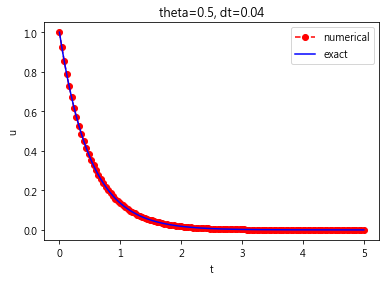

 0.5   0.04:    1.887E-04


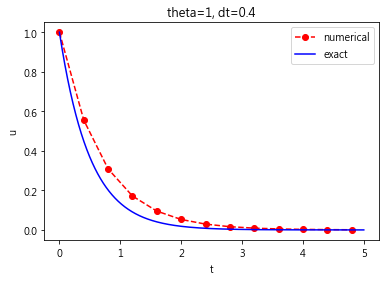

 1.0   0.40:    1.167E-01


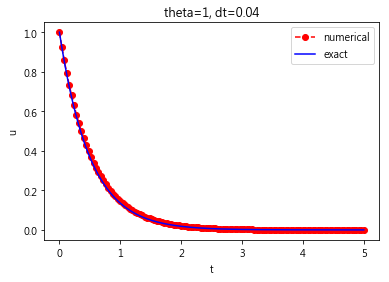

 1.0   0.04:    1.382E-02


In [18]:
from numpy import *
from matplotlib.pyplot import *

def solver(I, a, T, dt, theta):
    """Solve u'=-a*u, u(0)=I, for t in (0,T] with steps of dt."""
    dt = float(dt)            # avoid integer division
    Nt = int(round(T/dt))     # no of time intervals
    T = Nt*dt                 # adjust T to fit time step dt
    u = zeros(Nt+1)           # array of u[n] values
    t = linspace(0, T, Nt+1)  # time mesh

    u[0] = I                  # assign initial condition
    for n in range(0, Nt):    # n=0,1,...,Nt-1
        u[n+1] = (1 - (1-theta)*a*dt)/(1 + theta*dt*a)*u[n]
    return u, t

def u_exact(t, I, a):
    return I*exp(-a*t)

def explore(I, a, T, dt, theta=0.5, makeplot=True):
    """
    Run a case with the solver, compute error measure,
    and plot the numerical and exact solutions (if makeplot=True).
    """
    u, t = solver(I, a, T, dt, theta)    # Numerical solution
    u_e = u_exact(t, I, a)
    e = u_e - u
    E = sqrt(dt*sum(e**2))
    if makeplot:
        figure()                         # create new plot
        t_e = linspace(0, T, 1001)       # fine mesh for u_e
        u_e = u_exact(t_e, I, a)
        plot(t,   u,   'r--o')           # red dashes w/circles
        plot(t_e, u_e, 'b-')             # blue line for exact sol.
        legend(['numerical', 'exact'])
        xlabel('t')
        ylabel('u')
        title('theta=%g, dt=%g' % (theta, dt))
        theta2name = {0: 'FE', 1: 'BE', 0.5: 'CN'}
#         savefig('%s_%g.png' % (theta2name[theta], dt))
#         savefig('%s_%g.pdf' % (theta2name[theta], dt))
        show()
    return E

def main(I, a, T, dt_values, theta_values=(0, 0.5, 1)):
    print('theta   dt       error')  # Column headings in table
    for theta in theta_values:
        for dt in dt_values:
            E = explore(I, a, T, dt, theta, makeplot=True)
            print('%4.1f %6.2f: %12.3E'%(theta, dt, E))

main(I=1, a=2, T=5, dt_values=[0.4, 0.04])


## plot xkcd

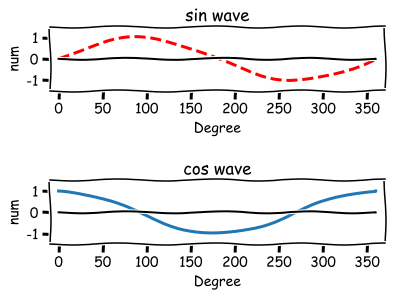

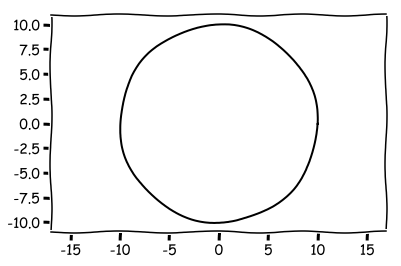

In [19]:
import matplotlib.pyplot as plt #for graphing and "plt" is easy to access
import numpy as np #for mathmatic

x1= np.arange(0,360,0.1)
y1= np.sin(x1 * np.pi /180)
x2 = x1
y2 = np.cos(x2 * np.pi / 180.0)
x3 = x1
y3= x3*0 
r = 10
x4 = 0 + r * np.cos(x1 * np.pi /180)
y4 = 0 + r * np.sin(x1 * np.pi /180)


with plt.xkcd(): #a kind of way to change the graph
  plt.subplot(311) #subplot("How many graphs in a column","How many graphs in a row" ,"number of graph(in column)")
  plt.plot (x1,y1,"r--",lw=3) 
  plt.plot (x3,y3,"black") 
  plt.xlabel("Degree") 
  plt.ylabel("num") 
  plt.title("sin wave") 
  plt.xlim(-10,370) 
  plt.ylim(-1.5,1.5) 
  #plt.xticks([10, 50,80,......]) : decide the unit of axis
  plt.subplot(313)
  plt.plot (x2,y2,lw=3)
  plt.plot (x3,y3,"black")
  plt.xlabel("Degree")
  plt.ylabel("num")
  plt.title("cos wave")
  plt.xlim(-10,370)
  plt.ylim(-1.5,1.5)
  fig = plt.figure() 
  axes = fig.add_subplot(111) 
  axes.plot(x4, y4,"black")
  axes.axis('equal')
  plt.show()